In [1]:
import numpy as np
import utils
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
from autoembedding.embeddings_matrix import build_embeddings_matrix
#InteractiveShell.ast_node_interactivity = "all"

In [2]:

embeddings_dict = utils.get_embeddings_dict("dataset/NEIS2157.json")

IDs, embeddings_matrix = build_embeddings_matrix(
    embeddings_dict = embeddings_dict,
    embedder="prose",
    combiner_method="average"
)

embeddings_matrix.shape

(27, 100)

ward


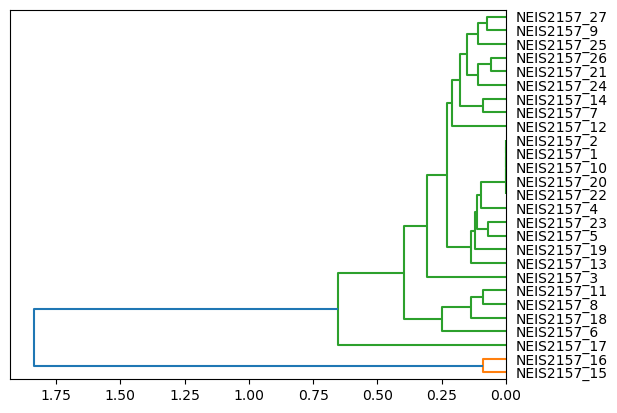

single


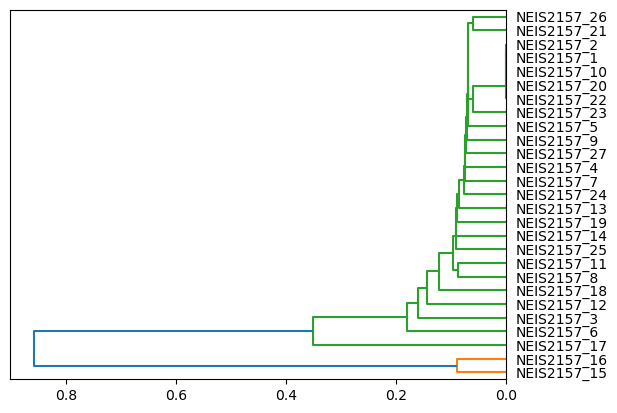

complete


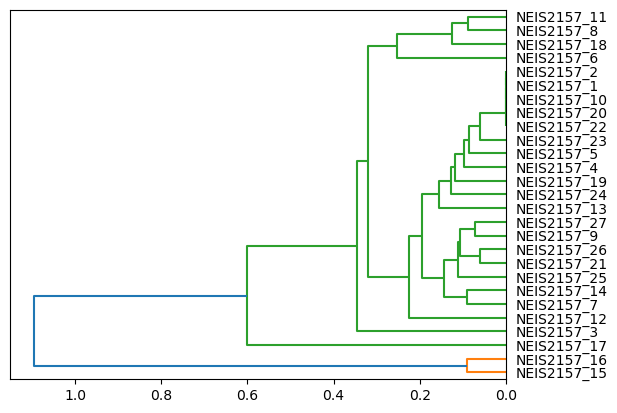

centroid


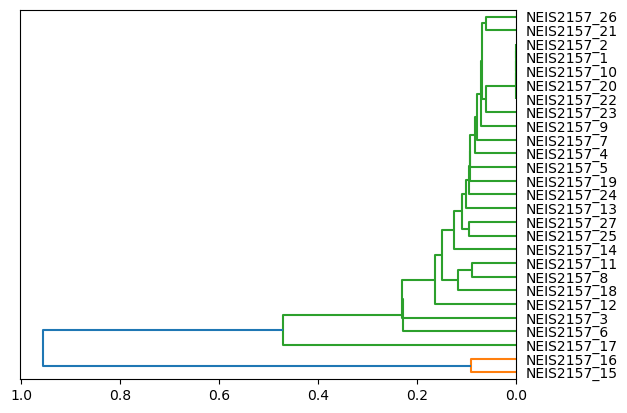

median


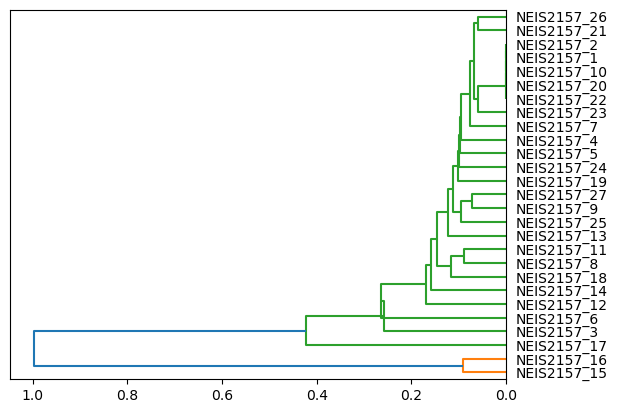

weighted


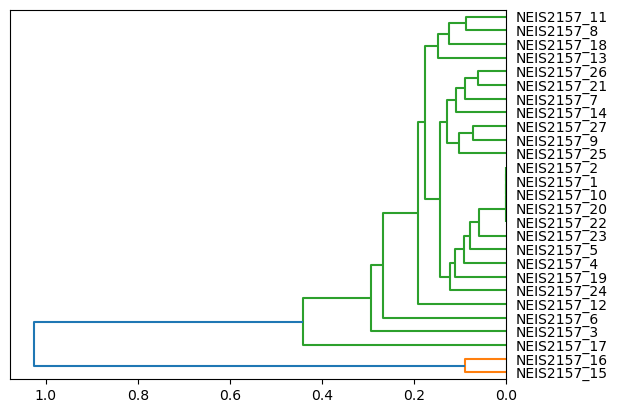

average


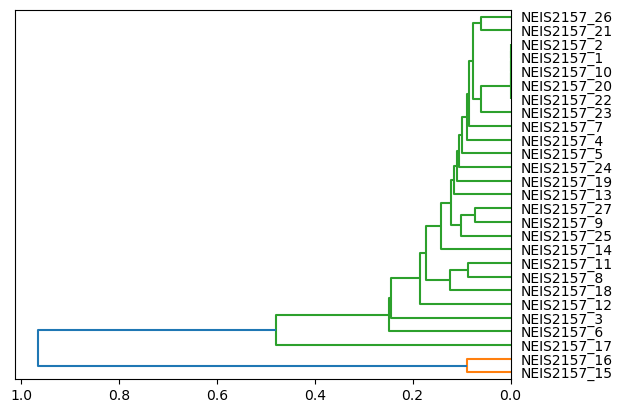

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

methods = ["ward", "single", "complete", "centroid", "median", "weighted", "average"]

condensed_distances = pdist(embeddings_matrix)

for method in methods:
    print(method)
    # Perform hierarchical clustering
    Z = linkage(condensed_distances, method=method)
    # Plot dendrogram
    dendrogram(Z, orientation="left", labels=IDs)

    plt.show()

# Get cluster labels
#max_d =30  # set the maximum distance between clusters
#labels = fcluster(Z, max_d, criterion='distance')
#print(labels)

In [4]:
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO

cmd =  ClustalwCommandline("clustalw2", infile="dataset/NEIS2157.fasta", outfile="dataset/NEIS2157_aligned.aln")
#stdout, stderr = cmd()


aln = AlignIO.read("dataset/NEIS2157_aligned.aln", "clustal")



INFO  : Finished optimising at entanglement 0.05 (tanglegram.tangle)
INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


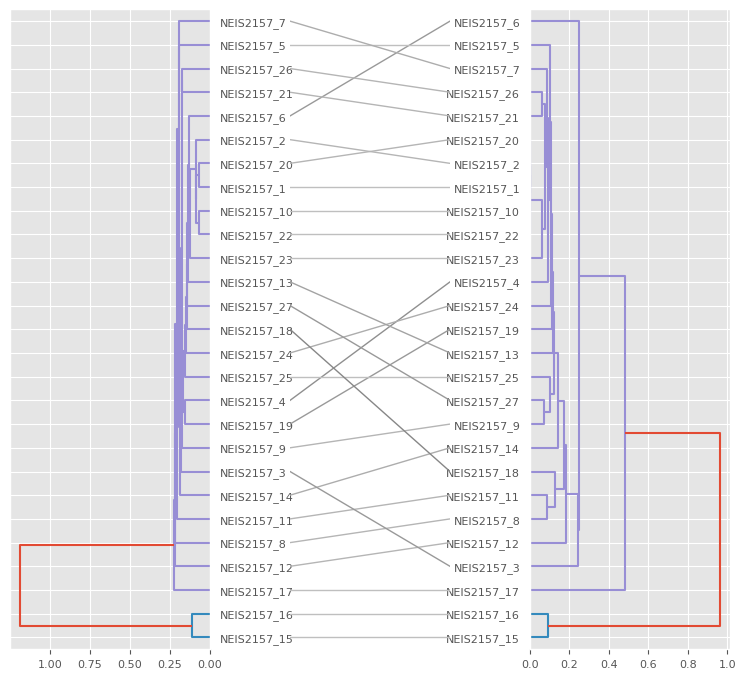

In [11]:
import tanglegram as tg
import matplotlib.pyplot as plt


# Building the embeddings matices
IDs, embeddings_matrix_A = build_embeddings_matrix(
    embeddings_dict = embeddings_dict,
    embedder="rep",
    combiner_method="none"
)

IDs, embeddings_matrix_B = build_embeddings_matrix(
    embeddings_dict = embeddings_dict,
    embedder="prose",
    combiner_method="average"
)

# buliding an array encoding the pairwise distances between rows (observations) in the embedding matrix
condensed_distances_A = pdist(embeddings_matrix_A)
condensed_distances_B = pdist(embeddings_matrix_B)

# Calculating the hierarchical clustering 
linkage_matrix_A = linkage(condensed_distances_A, method="average")
linkage_matrix_B = linkage(condensed_distances_B, method="average")
                   

# Plot tanglegram
fig = tg.plot(
    linkage_matrix_A, 
    linkage_matrix_B,
    labelsA=IDs,
    labelsB=IDs,
    sort="step2side", 
    link_kwargs = {},
    dend_kwargs={}
)

plt.show()